Number of clusters: 2, Davies-Bouldin Index: 2.222653475927108
Number of clusters: 3, Davies-Bouldin Index: 1.7666606290164626
Number of clusters: 4, Davies-Bouldin Index: 1.6184350884530962
Number of clusters: 5, Davies-Bouldin Index: 1.5836975290424349
Number of clusters: 6, Davies-Bouldin Index: 1.5595387029455428
Number of clusters: 7, Davies-Bouldin Index: 1.6548154203942693
Number of clusters: 8, Davies-Bouldin Index: 1.6423572186980102
Number of clusters: 9, Davies-Bouldin Index: 1.7065994284677293


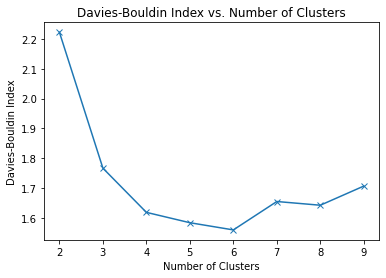

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score  # Import davies_bouldin_score
import skfuzzy as fuzz
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

df = pd.read_csv("file_train_senza_outliers.csv")

X = df.select_dtypes(include=float).values

# min-max, fit and trasform directly
scaler = MinMaxScaler()
X_scal = scaler.fit_transform(X)

# Set a range of cluster numbers to try
cluster_range = range(2, 10)

davies_bouldin_scores = []

for num_clusters in cluster_range:
    # Perform Fuzzy C-Means clustering
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scal.T, num_clusters, 1.1, error=1e-3, maxiter=100, seed=94)
    
    # Get cluster assignments for each data point
    cluster_membership = np.argmax(u, axis=0)
    
    # Calculate Davies-Bouldin index
    davies_bouldin_idx = davies_bouldin_score(X_scal, cluster_membership)
    davies_bouldin_scores.append(davies_bouldin_idx)

    print(f"Number of clusters: {num_clusters}, Davies-Bouldin Index: {davies_bouldin_idx}")

# Plotting the results
plt.plot(cluster_range, davies_bouldin_scores, marker='x')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()


Silhouette Score: 0.22671192814956875
Davis-Bouldin: 1.7666606290164626
